In [23]:
import skimage.io as io
import matplotlib.pyplot as plt
import skimage.filters as fltr
import numpy as np
from skimage import filters
from scipy import ndimage

#### Map values to the (0, 255) range

In [418]:
def map(image):
    Mapped_image = (image - np.amin(image))*255.0 /(np.amax(image)-np.amin(image))
    return Mapped_image


#### Set negative values to 0, values over 255 to 255

In [421]:
def clip(image):
    cliped_image = np.clip(image, 0, 255)
    return cliped_image 

# Point Detection

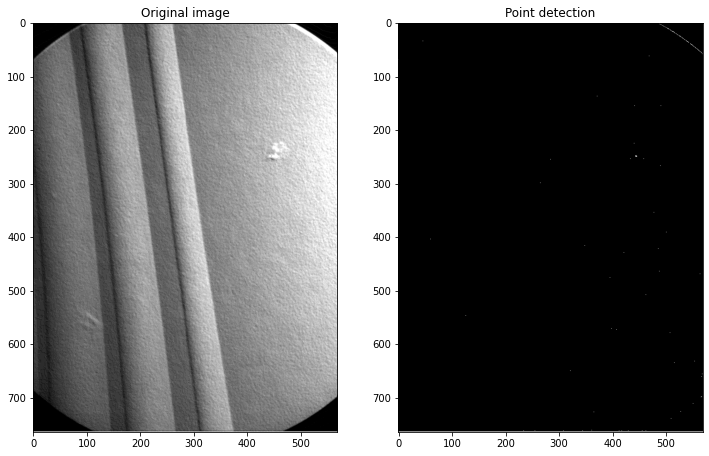

In [541]:
image = io.imread("Fig1004(b)(turbine_blade_black_dot).tif")
image = map(image)

mask = np.array([[-1, -1, -1],
                 [-1, 8, -1],
                 [-1, -1, -1]])

# Apply the filter to the image
filtered = ndimage.convolve(image, mask)
filtered = clip(filtered)
# Apply Threshold
filtered = filtered>254

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(image, cmap="gray")

plt.title("Original image")
plt.subplot(122)
plt.imshow(filtered, cmap="gray")
plt.title("Point detection")

plt.show()

# Line Detection

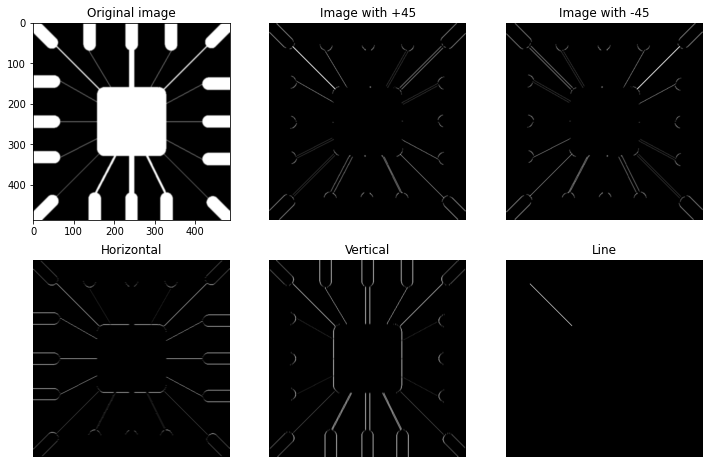

In [579]:
plt.figure(figsize=(12,8))
plt.subplot(231)
image2 = io.imread("Fig1005(a)(wirebond_mask).tif")
image2 = map(image2)
image2 = ndimage.gaussian_filter(image2, sigma=1)
plt.imshow(image2, 'gray')
plt.title("Original image")

plt.subplot(232)
mask = np.array([[2,-1,-1],
                 [-1,2,-1],
                 [-1,-1,2]])
laplacian_pos_45 = ndimage.convolve(image2, mask)
laplacian_pos_45 = clip(laplacian_pos_45)
plt.imshow(laplacian_pos_45, 'gray')
plt.title("Image with +45")
plt.axis('off')

plt.subplot(233)
mask1 = np.array([[-1,-1,2],
                 [-1,2,-1],
                 [2,-1,-1]])
laplacian_neg_45 = ndimage.convolve(image2, mask1)
laplacian_neg_45 = clip(laplacian_neg_45)
plt.imshow(laplacian_neg_45, 'gray')
plt.title("Image with -45")
plt.axis('off')

plt.subplot(234)
mask2 = np.array([[-1,-1,-1], [2,2,2], [-1,-1,-1]])
laplacian_Horizontal = ndimage.convolve(image2, mask2)
laplacian_Horizontal = clip(laplacian_Horizontal)
plt.imshow(laplacian_Horizontal, 'gray')
plt.title("Horizontal")
plt.axis('off')

plt.subplot(235)
mask3 = np.array([[-1,2,-1], [-1,2,-1], [-1,2,-1]])
laplacian_Vertical = ndimage.convolve(image2, mask3)
laplacian_Vertical = clip(laplacian_Vertical)
plt.imshow(laplacian_Vertical, 'gray')
plt.title("Vertical")
plt.axis('off')

plt.subplot(236)
Line = laplacian_pos_45 > 254
plt.imshow(Line, 'gray')
plt.title("Line")
plt.axis('off')
plt.show()

# Edge Detection

## Robert Filter

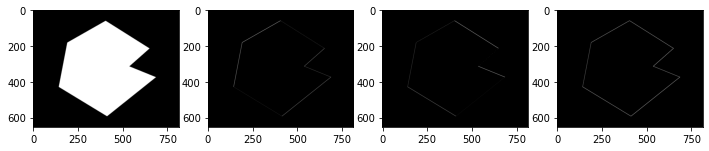

In [582]:
plt.figure(figsize=(12, 8))
image3 = io.imread("Fig1036(a)(original_septagon).tif")
imag3 = map(image3)

mask1 = np.array([[-1,0], [0,1]])
mask2 = np.array([[0,-1], [1,0]])

Robert = ndimage.convolve(image3, mask1)
Robert = clip(Robert)

Robert2 = ndimage.convolve(image3, mask2)
Robert2 = clip(Robert2)

Robert3 = np.sqrt (np.add (np.square (Robert), np.square (Robert2)))

plt.subplot(1,4,1)
plt.imshow(image3, 'gray')
plt.subplot(1,4,2)
plt.imshow(Robert, 'gray')
plt.subplot(1,4,3)
plt.imshow(Robert2, 'gray')
plt.subplot(1,4,4)
plt.imshow(Robert3, 'gray')
plt.show()

## Sobel Filter

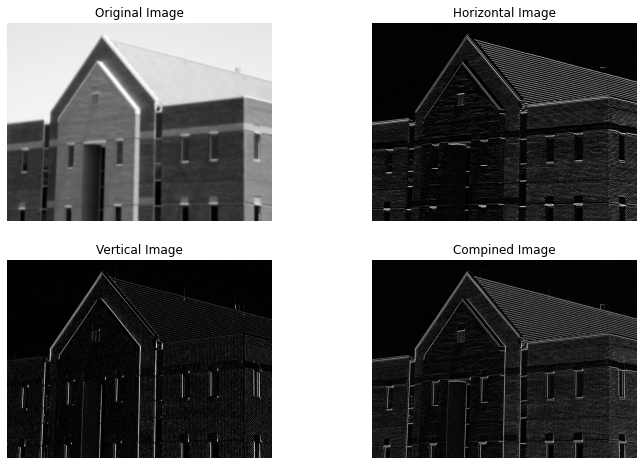

In [476]:
plt.figure(figsize=(12, 8))
image4 = io.imread("Fig1016(a)(building_original).tif")
image4 = map(image4)

mask_H = np.array([[-1,-2,-1], [0,0,0],[1,2,1]])
mask_V = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])

sobel_H = ndimage.convolve(image4, mask_H)
sobel_H = clip(sobel_H)
sobel_V = ndimage.convolve(image4, mask_V)
sobel_V = clip(sobel_V)

plt.subplot(2,2,1)
plt.imshow(image3, 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(sobel_H, 'gray')
plt.title('Horizontal Image')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(sobel_V, 'gray')
plt.title('Vertical Image')
plt.axis('off')

Compined = np.sqrt (np.add (np.square (sobel_H), np.square (sobel_V)))
plt.subplot(2,2,4)
plt.title('Compined Image')
plt.imshow(Compined, 'gray')
plt.axis('off')

plt.show()

## Sobel With Gaussian 

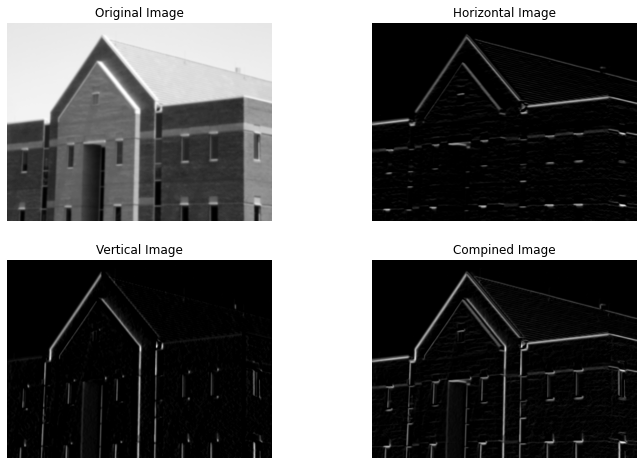

In [445]:
plt.figure(figsize=(12, 8))
image4 = io.imread("Fig1016(a)(building_original).tif")
image4 = map(image4)

image4 = ndimage.gaussian_filter(image4, sigma=3)

mask_H = np.array([[-1,-2,-1], [0,0,0],[1,2,1]])
mask_V = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])

sobel_H = ndimage.convolve(image4, mask_H)
sobel_H = clip(sobel_H)
sobel_V = ndimage.convolve(image4, mask_V)
sobel_V = clip(sobel_V)

plt.subplot(2,2,1)
plt.imshow(image3, 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(sobel_H, 'gray')
plt.title('Horizontal Image')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(sobel_V, 'gray')
plt.title('Vertical Image')
plt.axis('off')

Compined = np.sqrt (np.add (np.square (sobel_H), np.square (sobel_V)))
plt.subplot(2,2,4)
plt.title('Compined Image')
plt.imshow(Compined, 'gray')
plt.axis('off')
plt.show()

## Marr_Hildreth

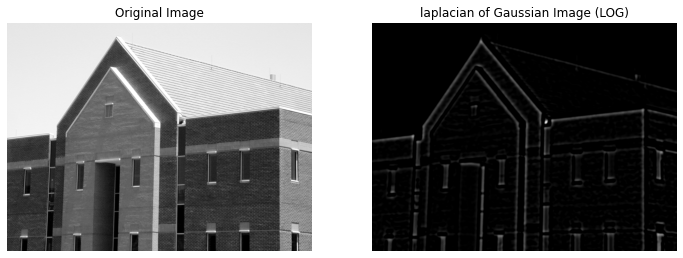

In [527]:
plt.figure(figsize=(12, 8))
image4 = io.imread("Fig1016(a)(building_original).tif")
image4 = map(image4)

LOG = ndimage.gaussian_laplace(image4, sigma=5)
LOG = clip(LOG)

plt.subplot(1,2,1)
plt.imshow(image4, 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(LOG, 'gray')
plt.title('laplacian of Gaussian Image (LOG)')
plt.axis('off')

plt.show()

## Canny 

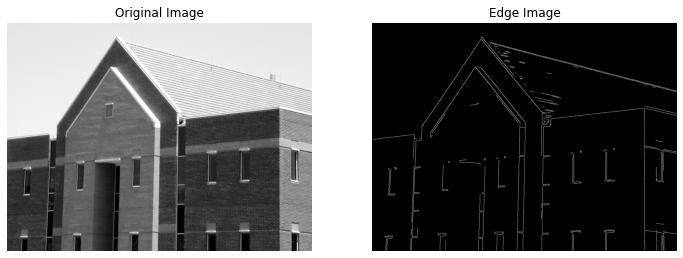

In [528]:
# Import the necessary libraries
from skimage import io, feature

# Load the image as a numpy array
image4 = io.imread("Fig1016(a)(building_original).tif")
image4 = map(image4)

# Apply the Canny edge detection
canny = feature.canny(image4, sigma=1, low_threshold=150, high_threshold=200)

# Show the original and the edge images
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(image4, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(canny, cmap='gray')
plt.title('Edge Image')
plt.axis('off')

plt.show()
